In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

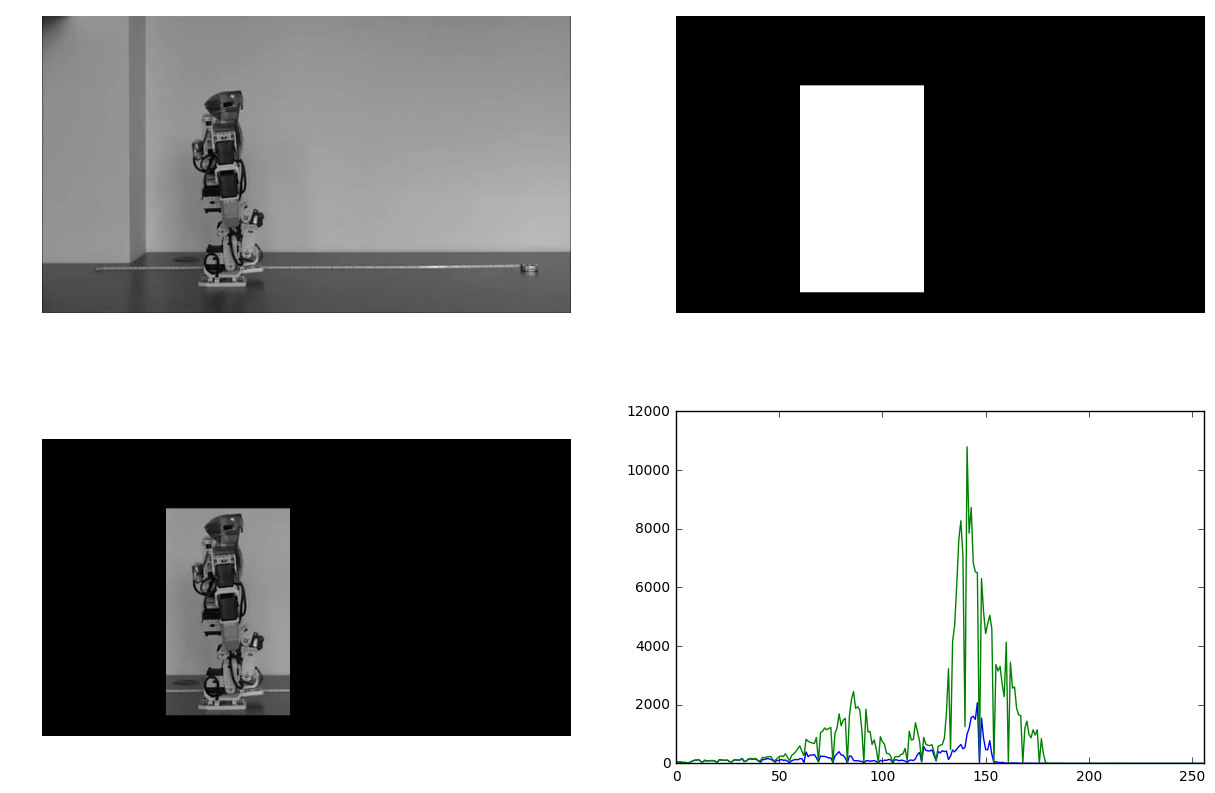

In [2]:
img = cv2.imread('data/biowalk-0300.png',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[85:335, 150:300] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(img, 'gray'), plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray'), plt.axis('off')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.axis('off')
plt.subplot(224), plt.plot(hist_mask), plt.plot(hist_full)
plt.xlim([0,256])

plt.show()

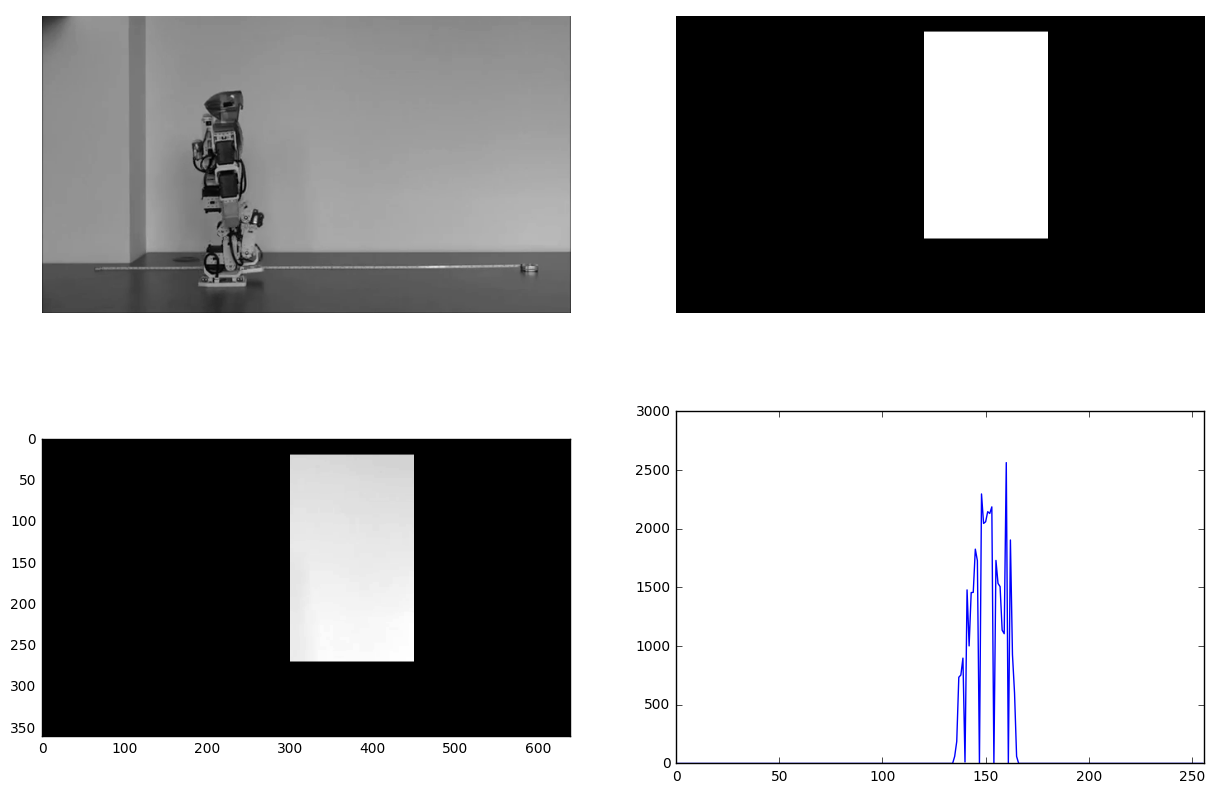

In [3]:
img = cv2.imread('data/biowalk-0300.png',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[20:270, 300:450] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(img, 'gray'), plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray'), plt.axis('off')
plt.subplot(223), plt.imshow(masked_img, 'gray'), #plt.axis('off')
plt.subplot(224), plt.plot(hist_mask) # , plt.plot(hist_full)
plt.xlim([0,256])

plt.show()

(0, 256)

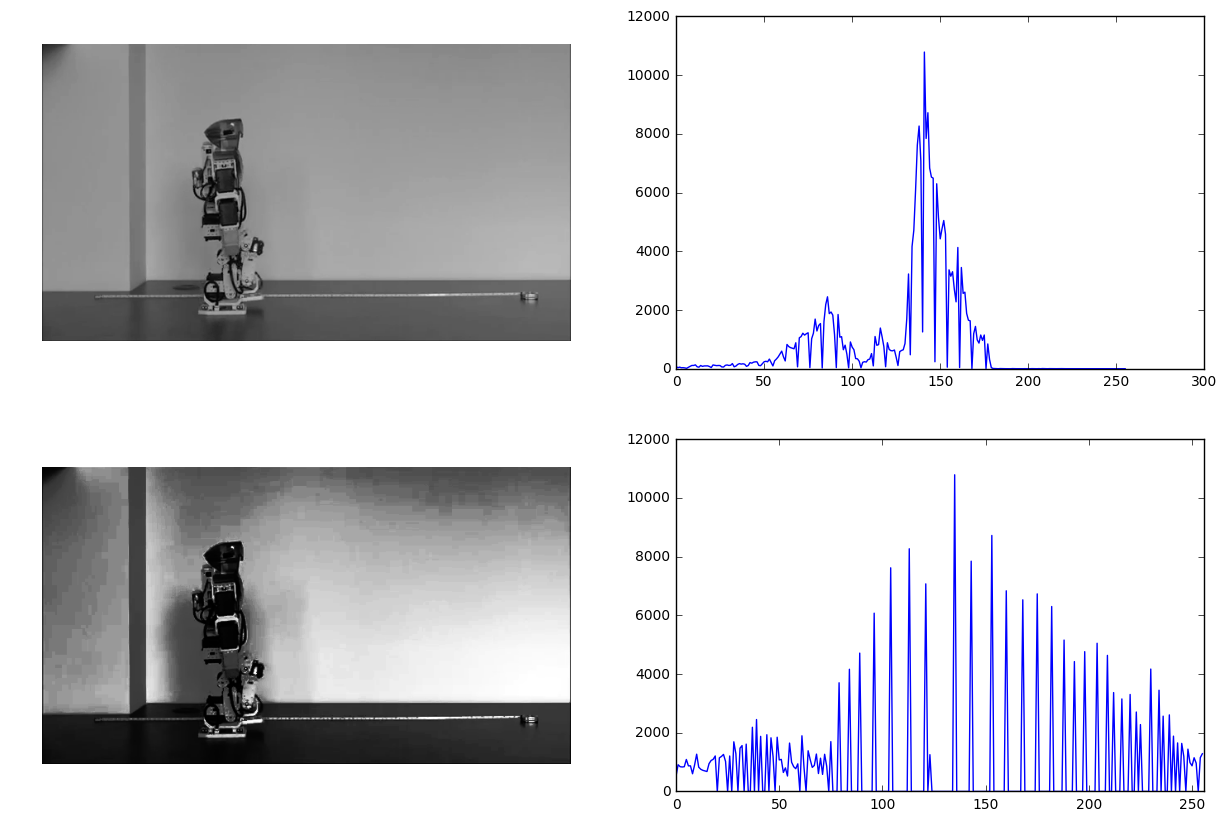

In [4]:
img_reduced = img#[85:335, 150:300]
equ_reduced = cv2.equalizeHist(img_reduced)

hist_full = cv2.calcHist([img_reduced],[0],None,[256],[0,256])
hist_full_reduced = cv2.calcHist([equ_reduced],[0],None,[256],[0,256])

plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(img_reduced, 'gray'), plt.axis('off')
plt.subplot(222), plt.plot(hist_full)
plt.subplot(223), plt.imshow(equ_reduced, 'gray'), plt.axis('off')
plt.subplot(224), plt.plot(hist_full_reduced)
plt.xlim([0,256])


(<matplotlib.axes._subplots.AxesSubplot at 0x7f573e94bdd0>,
 (-0.5, 149.5, 249.5, -0.5))

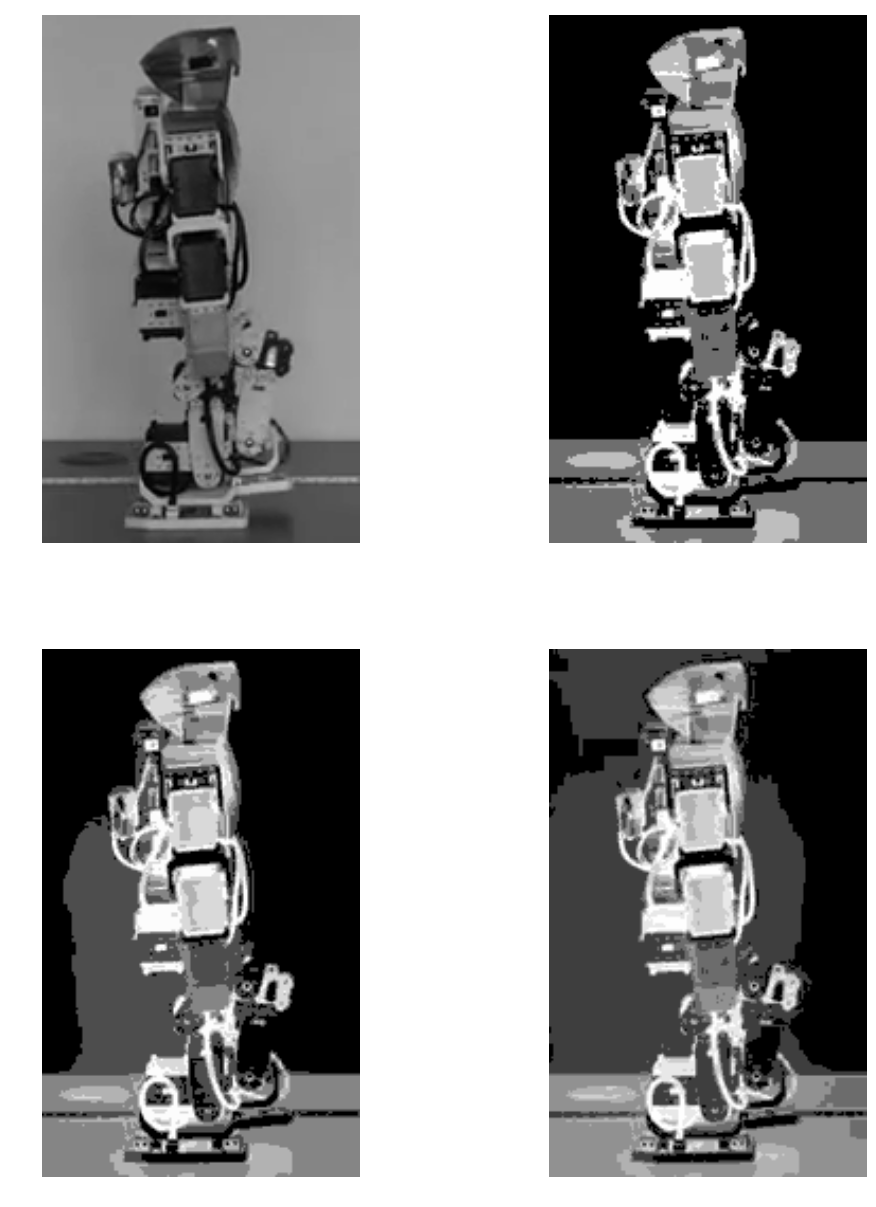

In [77]:
def make_power_level_func(gam):
    return lambda x:np.uint8(255*(255**-gam)*x**gam)

def log_levels_func(levels):
    return np.uint8(np.log(1+levels)/np.log(255)*255)

def multithreshold(im,n_levs,levels=-1, levels_func=lambda x: x, is_inv_im=False):
    new_im = im.copy()
    if is_inv_im:
        new_im = 255-new_im
    if levels==-1:
        levels = np.hstack((np.arange(0,255,256/n_levs),255))
    levels = levels_func(levels)
    for i, level in enumerate(levels[1:]):
        new_im[(new_im>levels[i]) & (new_im<=level)] = level
    new_im[new_im==0]=levels[1]
    return new_im

img_reduced = img[85:335, 150:300]
# img_reduced = cv2.equalizeHist(img_reduced)
# res,img_thre = cv2.threshold(img_reduced,128,255,cv2.THRESH_TRUNC)

is_inv_im = True
# fun_thre = lambda x: x
# fun_thre = log_levels_func
fun_thre = make_power_level_func(0.4)
img_thre4 = multithreshold(img_reduced,4,levels_func=fun_thre,is_inv_im=is_inv_im)
img_thre6 = multithreshold(img_reduced,6,levels_func=fun_thre,is_inv_im=is_inv_im)
img_thre8 = multithreshold(img_reduced,8,levels_func=fun_thre,is_inv_im=is_inv_im)

#plt.figure(figsize=(15,8))
plt.figure(figsize=(12,15))
plt.subplot(221), plt.imshow(img_reduced, 'gray'), plt.axis('off')
plt.subplot(222), plt.imshow(img_thre4, 'gray'), plt.axis('off')
plt.subplot(223), plt.imshow(img_thre6, 'gray'), plt.axis('off')
plt.subplot(224), plt.imshow(img_thre8, 'gray'), plt.axis('off')


(<matplotlib.axes._subplots.AxesSubplot at 0x7f573d972f50>,
 (-0.5, 149.5, 249.5, -0.5))

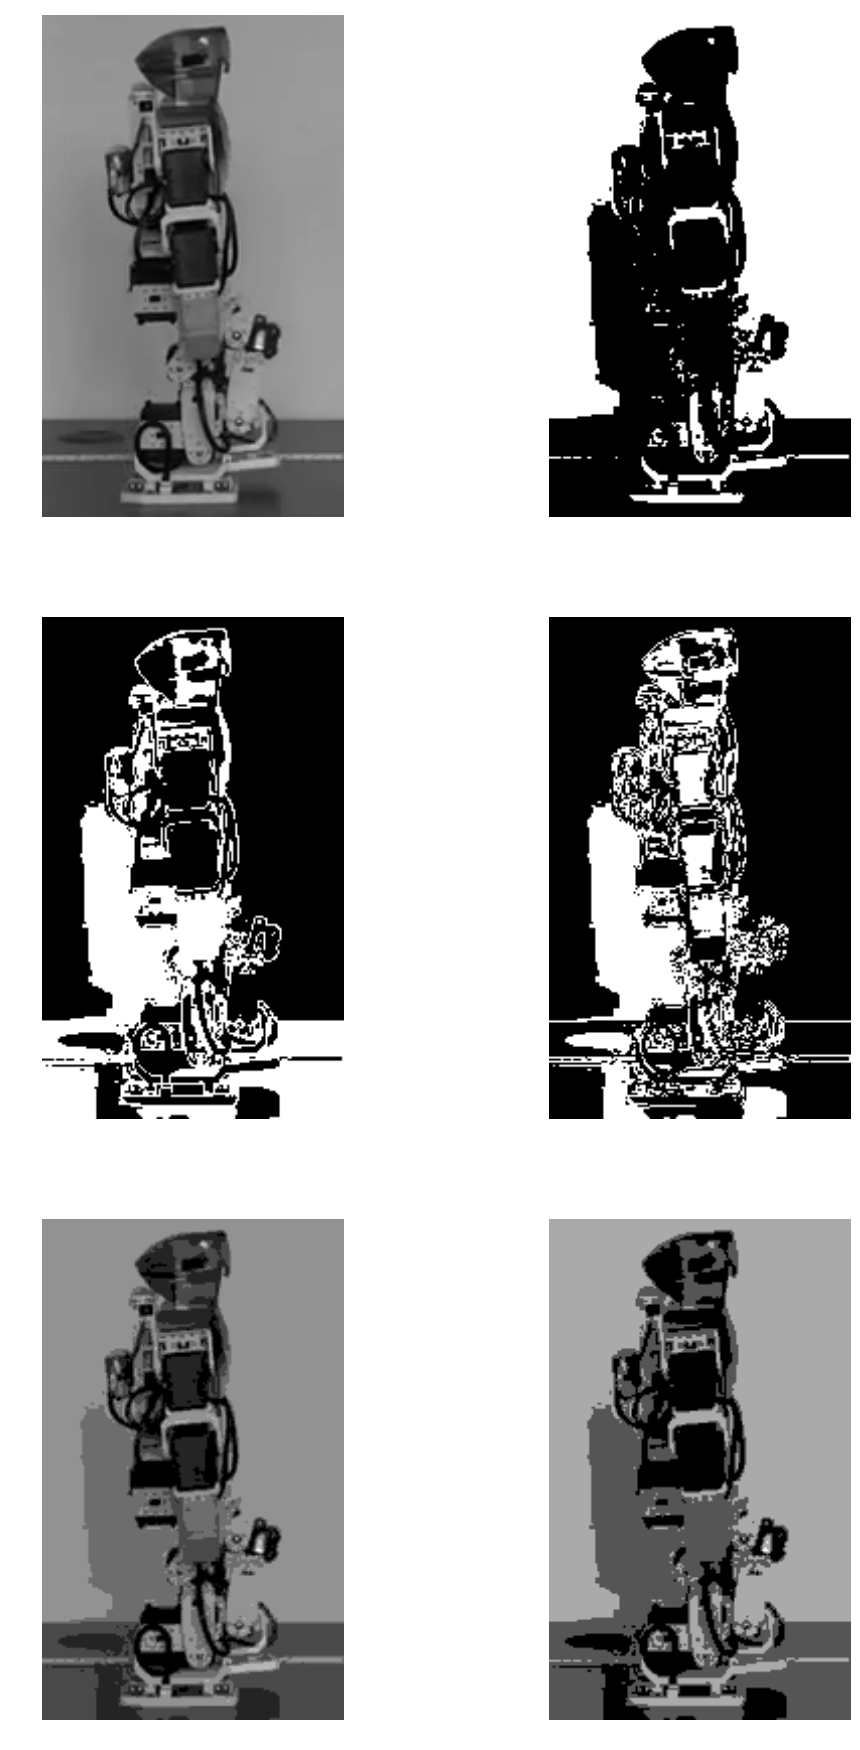

In [85]:
img_reduced = img[85:335, 150:300]
img_8b = cv2.bitwise_and(img_reduced,0x80)
img_7b = cv2.bitwise_and(img_reduced,0x40)
img_6b = cv2.bitwise_and(img_reduced,0x20)
img_78b = cv2.bitwise_and(img_reduced,0xc0)
img_678b = cv2.bitwise_and(img_reduced,0xe0)

#plt.figure(figsize=(15,8))
plt.figure(figsize=(12,22))
plt.subplot(321), plt.imshow(img_reduced, 'gray'), plt.axis('off')
plt.subplot(322), plt.imshow(img_8b, 'gray'), plt.axis('off')
plt.subplot(323), plt.imshow(img_7b, 'gray'), plt.axis('off')
plt.subplot(324), plt.imshow(img_6b, 'gray'), plt.axis('off')
plt.subplot(325), plt.imshow(img_678b, 'gray'), plt.axis('off')
plt.subplot(326), plt.imshow(img_78b, 'gray'), plt.axis('off')


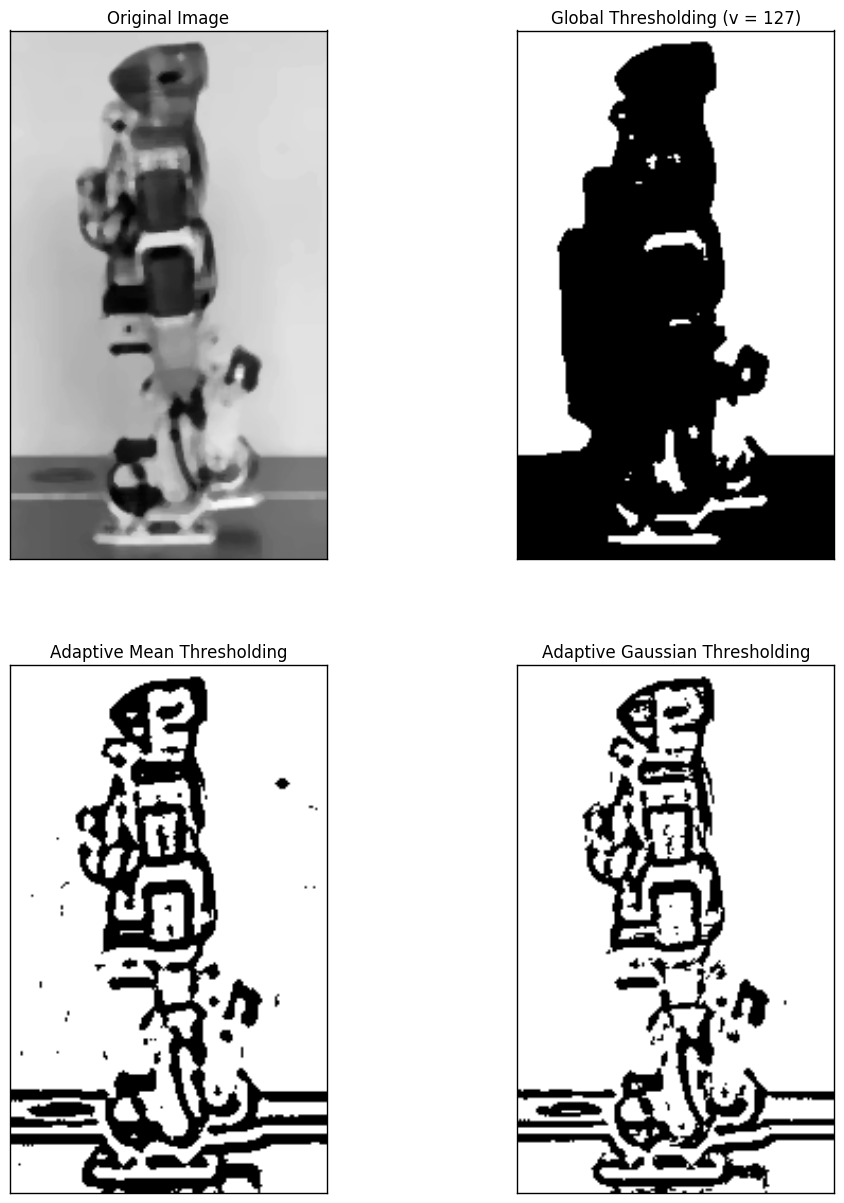

In [92]:
img_reduced = img[85:335, 150:300]
img_reduced = cv2.medianBlur(img_reduced,5)

ret,th1 = cv2.threshold(img_reduced,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_reduced,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_reduced,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_reduced, th1, th2, th3]

plt.figure(figsize=(12,15))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


(1, 0)
(255, 0)
(255, 0)
(250, 150)


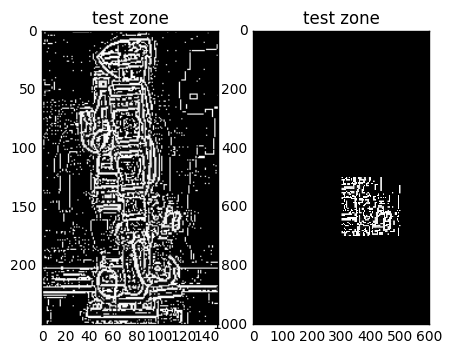

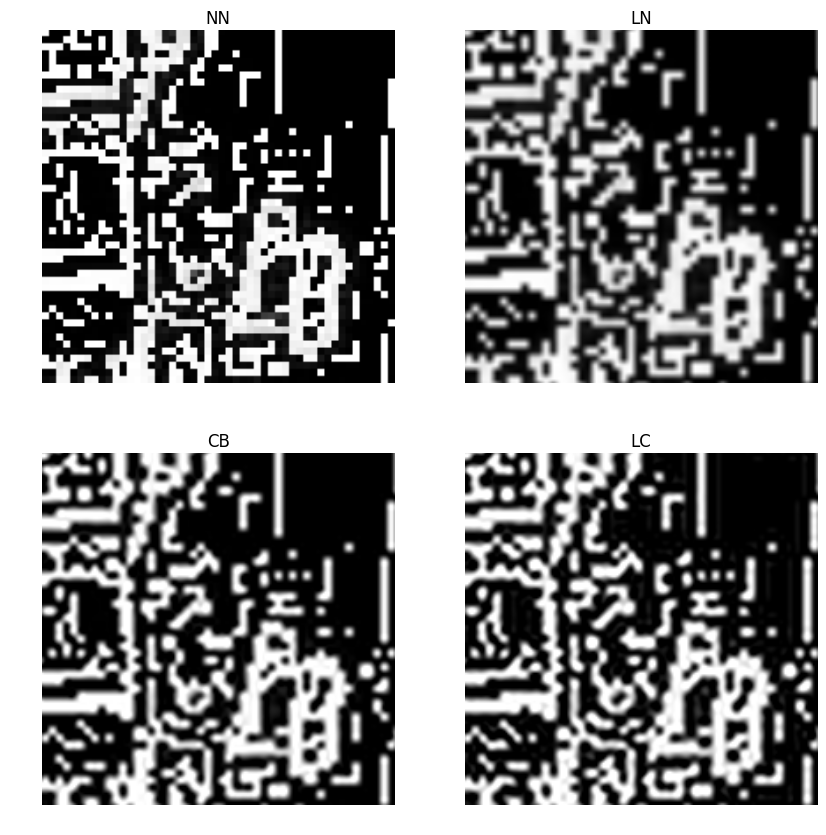

In [49]:
img_reduced = img[85:335, 150:300]-np.bitwise_and(img[85:335, 150:300],254)
print(np.max(img_reduced),np.min(img_reduced))
img_reduced = cv2.add(img[85:335, 150:300],-np.bitwise_and(img[85:335, 150:300],254))
print(np.max(img_reduced),np.min(img_reduced))
img_reduced = img[85:335, 150:300]-cv2.blur(img[85:335, 150:300],(3,3))
print(np.max(img_reduced),np.min(img_reduced))
#img_reduced = cv2.add(img[85:335, 150:300],-cv2.blur(img[85:335, 150:300],(5,5)))
#print(np.max(img_reduced),np.min(img_reduced))
#img_reduced = img[85:335, 150:300]/img[20:270, 300:450]
print(img_reduced.shape)
img_x2NN = cv2.resize(img_reduced, None,fx=4, fy=4,interpolation=cv2.INTER_NEAREST)
img_x2LN = cv2.resize(img_reduced, None,fx=4, fy=4,interpolation=cv2.INTER_LINEAR)
img_x2CB = cv2.resize(img_reduced, None,fx=4, fy=4,interpolation=cv2.INTER_CUBIC)
img_x2LC = cv2.resize(img_reduced, None,fx=4, fy=4,interpolation=cv2.INTER_LANCZOS4)

mask = np.zeros(img_x2NN.shape[:2], np.uint8)
mask[500:700,300:500] = 255
masked_img = cv2.bitwise_and(img_x2NN,img_x2NN,mask = mask)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1),plt.imshow(img_reduced, 'gray'), plt.title('test zone')
plt.subplot(1,2,2),plt.imshow(masked_img, 'gray'), plt.title('test zone')
plt.show()
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img_x2NN[500:700,300:500], 'gray'), plt.axis('off'), plt.title('NN')
plt.subplot(2,2,2),plt.imshow(img_x2LN[500:700,300:500], 'gray'), plt.axis('off'), plt.title('LN')
plt.subplot(2,2,3),plt.imshow(img_x2CB[500:700,300:500], 'gray'), plt.axis('off'), plt.title('CB')
plt.subplot(2,2,4),plt.imshow(img_x2LC[500:700,300:500], 'gray'), plt.axis('off'), plt.title('LC')
plt.show()